To filter positively correlating features, you can use the ``NumericalFeature.filter_correlation()`` method. We first load features to creat a feature matrix (``X``) using the ``DOM_GSEC`` example dataset (see [Breimann24c]_):

In [1]:
import aaanalysis as aa
aa.options["verbose"] = False
df_seq = aa.load_dataset(name="DOM_GSEC")
df_feat = aa.load_features()
aa.display_df(df=df_feat, show_shape=True, n_rows=5)

# Create feature matrix
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",0.000000,0.000000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",1.554800,2.109848
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",0.000000,0.000000


Providing ``X`` as positional argument, the ``NumericalFeature.filter_correlation()`` method will return a 1D boolean array called ``is_selected``:

In [2]:
# Filter features
nf = aa.NumericalFeature()
is_selected = nf.filter_correlation(X)
n = sum(is_selected)
print(f"{n} features were selected")
print(is_selected[0:5])

74 features were selected
[ True False False False False]


We can use ``is_select`` to obtain a filtered feature matrix:

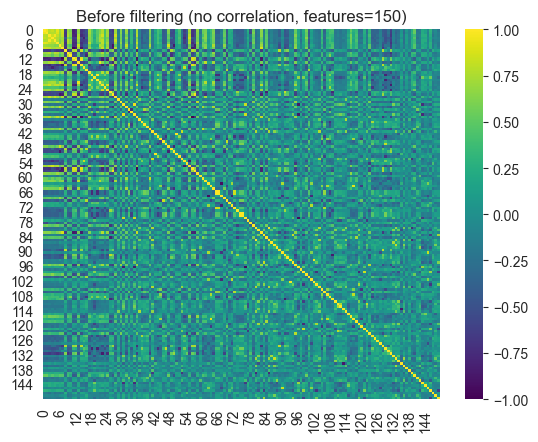

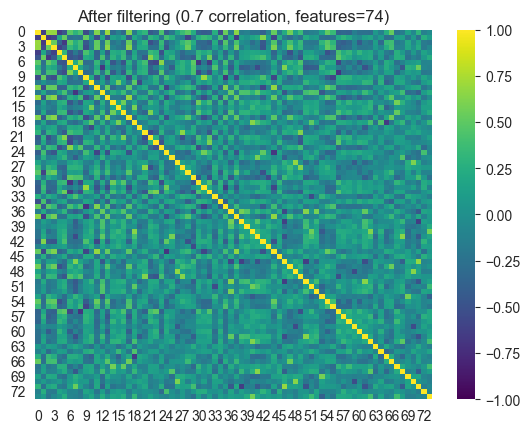

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create filtered feature matrix
X_filter = X.T[is_selected].T

# Show filtering effect
sns.heatmap(data=pd.DataFrame(X).corr(), cmap="viridis", vmin=-1)
plt.title(f"Before filtering (no correlation, features={X.shape[1]})")
plt.show()

plt.title(f"After filtering (0.7 correlation, features={X_filter.shape[1]})")
sns.heatmap(data=pd.DataFrame(X_filter).corr(), cmap="viridis", vmin=-1)
plt.show()

``is_selected`` an directly be used to filter the feature DataFrame:

In [4]:
# Create filtered feature DataFrame
df_feat_selected = df_feat[is_selected]
aa.display_df(df=df_feat_selected, show_shape=True, n_rows=5)

DataFrame shape: (74, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",1.747200,2.150664
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",1.788800,2.700803
14,"TMD_C_JMD_C-Seg...4,5)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.204000,0.105513,0.105513,0.132849,0.145219,0.000000,0.000009,"33,34,35,36",1.992000,2.929460
16,"TMD_C_JMD_C-Seg...3,4)-PRAM820102",Shape,Shape and Surface,Slope in Regression,"Slope in Regres...nnuswamy, 1982)",0.199000,0.073023,-0.073023,0.087336,0.107750,0.000000,0.000017,"31,32,33,34,35",0.616000,0.847660


Decreasing the correlation threshold (``max_cor``, default=0.7) will result in a stricter filtering and less selected features:

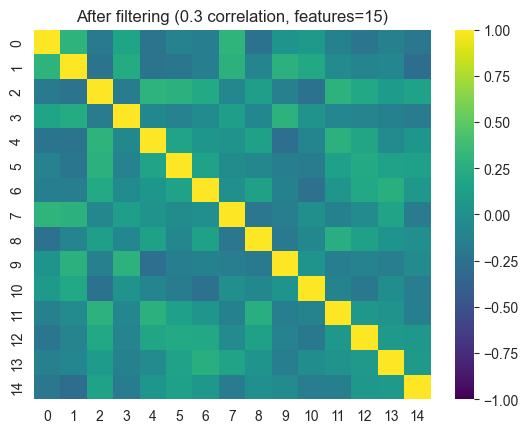

DataFrame shape: (15, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
20,"JMD_N_TMD_N-Seg...1,2)-KARP850101",Structure-Activity,Flexibility,Flexibility (0 ...igid neighbors),"Flexibility par...s-Schulz, 1985)",0.196000,0.062671,0.062671,0.083456,0.090427,0.000000,0.000023,"1,2,3,4,5,6,7,8,9,10",1.574400,1.835403
29,"JMD_N_TMD_N-Pat...,10)-AURR980116",Conformation,α-helix (C-cap),"α-helix (C-terminal, C-cap)","Normalized posi...ora-Rose, 1998)",0.184000,0.112728,-0.112728,0.166431,0.183800,0.000001,0.000061,"11,15",0.857600,1.339550
63,"TMD-Pattern(C,5...,12)-PRAM820102",Shape,Shape and Surface,Slope in Regression,"Slope in Regres...nnuswamy, 1982)",0.167000,0.077343,0.077343,0.135340,0.134263,0.000012,0.000228,"19,22,26",1.301600,1.697263
88,"JMD_N_TMD_N-Pat...,15)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.155000,0.059593,-0.059593,0.104862,0.110749,0.000050,0.000508,"6,9,12,15",0.482000,0.672000


In [5]:
is_selected = nf.filter_correlation(X, max_cor=0.3)

# Create filtered feature matrix
X_filter = X.T[is_selected].T

# Show filtering effect
plt.title(f"After filtering (0.3 correlation, features={X_filter.shape[1]})")
sns.heatmap(data=pd.DataFrame(X_filter).corr(), cmap="viridis", vmin=-1)
plt.show()

# Create filtered feature DataFrame
df_feat_selected = df_feat[is_selected]
aa.display_df(df=df_feat_selected, show_shape=True, n_rows=5)